In [2]:
%run "..\data_cleaning\data_preprocessing.ipynb"
from ast import literal_eval

In [3]:
def on_track():
    df = pd.read_csv("s3://data3001-racing/track_ratio.csv",index_col=0)
    df['left_closest'] = df['left_closest'].apply(literal_eval)
    df['right_closest'] = df['right_closest'].apply(literal_eval)
    on_track_df = df[df["track_ratio_left"]+df["track_ratio_right"]<1.2]
    return on_track_df

In [4]:
left_df = clean_left()
right_df = clean_right()

In [5]:
df = on_track()

In [8]:
df

,LAP_INDEX,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,...,right_shortest,left_closest,right_closest,left_closest_x,left_closest_y,right_closest_x,right_closest_y,track_width,track_ratio_left,track_ratio_right
0,1,1.003468e+19,1680,1,1,1.775714,16,30129,18569,87226.0,...,10.174289,"(116.08881378173828, 467.1883850097656)","(105.4539566040039, 458.6979064941406)",116.088814,467.188385,105.453957,458.697906,13.608395,0.253946,0.747648
1,1,1.003468e+19,1681,1,1,5.864580,66,30129,18569,87226.0,...,10.182519,"(118.38107299804688, 464.9837646484375)","(109.8089599609375, 454.4977111816406)",118.381073,464.983765,109.808960,454.497711,13.543945,0.248483,0.751813
2,1,1.003468e+19,1682,1,1,9.964501,116,30129,18569,87226.0,...,10.153931,"(121.62169647216795, 462.06842041015625)","(112.1916275024414, 452.2031555175781)",121.621696,462.068420,112.191628,452.203156,13.647331,0.256241,0.744023
3,1,1.003468e+19,1683,1,1,14.072903,166,30129,18569,87226.0,...,10.176946,"(124.0387954711914, 459.542724609375)","(114.97864532470705, 449.5224914550781)",124.038795,459.542725,114.978645,449.522491,13.508938,0.248865,0.753349
4,1,1.003468e+19,1684,1,1,18.184681,216,30129,18569,87226.0,...,10.242086,"(127.84263610839844, 455.8820495605469)","(117.3753433227539, 447.2208557128906)",127.842636,455.882050,117.375343,447.220856,13.586041,0.247416,0.753868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278104,1359,9.988606e+18,3258,2,1,836.135742,13271,32563,18983,91857.0,...,2.523359,"(595.0112915039062, -159.18409729003906)","(587.8803100585938, -165.7380828857422)",595.011292,-159.184097,587.880310,-165.738083,9.685330,0.757178,0.260534
278105,1359,9.988606e+18,3259,2,1,840.134277,13321,32563,18983,91857.0,...,2.344569,"(597.0923461914062, -161.74734497070312)","(589.7338256835938, -168.0529022216797)",597.092346,-161.747345,589.733826,-168.052902,9.690608,0.758692,0.241942
278106,1359,9.988606e+18,3260,2,1,844.142578,13371,32563,18983,91857.0,...,2.393826,"(599.1694946289062, -164.32089233398438)","(592.5140991210938, -171.54800415039062)",599.169495,-164.320892,592.514099,-171.548004,9.824736,0.756384,0.243653
278107,1359,9.988606e+18,3261,2,1,848.166992,13421,32563,18983,91857.0,...,2.388831,"(599.1694946289062, -164.32089233398438)","(594.6680908203125, -174.28103637695312)",599.169495,-164.320892,594.668091,-174.281036,10.930101,0.818635,0.218555


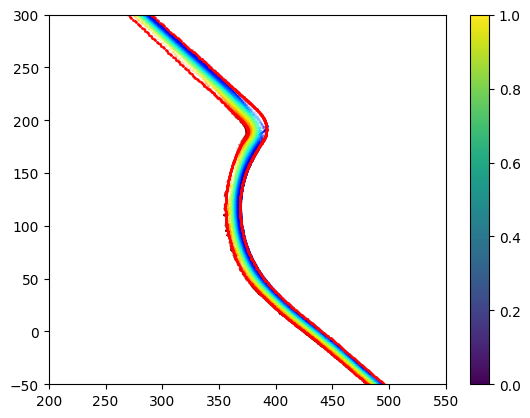

In [26]:
plt.scatter(df["WORLDPOSX"], df["WORLDPOSY"],c=df["track_ratio_left"], cmap='jet', alpha=1,s=0.01)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.xlim(200, 550)
plt.ylim(-50, 300)
plt.colorbar()
plt.show()

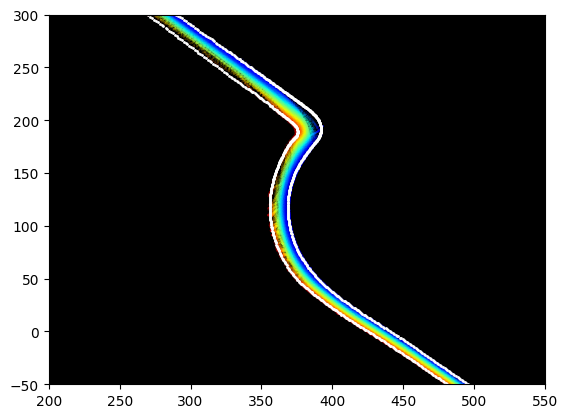

In [23]:
fig, ax = plt.subplots()
ax.set_facecolor('black')
ax.scatter(df["WORLDPOSX"], df["WORLDPOSY"],c=df["track_ratio_left"], cmap='jet', alpha=1,s=0.01)
ax.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='white')
ax.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='white')

plt.xlim(200, 550)
plt.ylim(-50, 300)

plt.show()
